# CIFAR-10: Image Dataset

Throughout this course, we will teach you all basic skills and supply you with all neccessary tools that you need to implement deep neural networks, which is the main focus of this class. However, you should also be proficient with handling data and know how to prepare it for your specific task. In fact, most of the jobs that involve deep learning in industry are very data related so this is an important skill that you have to pick up.

Therefore, we we will take a deep dive into data preparation this week by implementing our own datasets and dataloader. In this notebook, we will focus on the image dataset CIFAR-10. The CIFAR-10 dataset consists of 50000 32x32 colour images in 10 classes, which are *plane*, *car*, *bird*, *cat*, *deer*, *dog*, *frog*, *horse*, *ship*, *truck*.

Let's start by importing some libraries that we will need along the way, as well as our code files that we will work on throughout this notebook.

In [2]:
import os
import pickle

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

from exercise_code.data import (
    ImageFolderDataset,
    RescaleTransform,
    NormalizeTransform,
    ComposeTransform,
    compute_image_mean_and_std,
)
from exercise_code.tests import (
    test_image_folder_dataset,
    test_rescale_transform,
    test_compute_image_mean_and_std,
    test_len_dataset,
    test_item_dataset,
    test_transform_dataset,
    save_pickle
)

%load_ext autoreload
%autoreload 2
%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## 1. Dataset Download
Let us get started by downloading our data. In `exercise_code/data/image_folder_dataset.py` you can find a class `ImageFolderDataset`, which you will have to complete throughout this notebook.

This class automatically downloads the raw data for you. To do so, simply initialize the class as below:

In [3]:
# Set up the output dataset folder
i2dl_exercises_path = os.path.dirname(os.path.abspath(os.getcwd()))
cifar_root = os.path.join(i2dl_exercises_path, "datasets", "cifar10")

# Init the dataset and display downloading information this one time
dataset = ImageFolderDataset(
    root=cifar_root,
    force_download=False,
    verbose=True
)

Found dataset folder. Skipped downloading. If you face issues, please re-download the dataset using
'--force_download=True'


You should now be able to see the images in `i2dl_exercises/datasets/cifar10` in your file browser, which should contain one subfolder per class, each containing the respective images labeled `0001.png`, `0002.png`, ...

By default, the dataset will only be downloaded the first time you initialize a dataset class. If, for some reason, your version of the dataset gets corrupted and you wish to redownload it, simply initialize the class with `force_download=True` in the download cell above.

## 2. Data Visualization

Before training any model you should *always* take a look at some samples of your dataset. This way you can make sure that the data input has worked as intended and you can get a feeling for the dataset. 

Let's load the CIFAR-10 data and visualize a subset of the images. To do so, we use `PIL.Image.open()` to open an image, and then `numpy.asarray()` to cast the image to an numpy array, which will have shape 32x32x3. We will load 7 images per class in this way, and then we use `matplotlib.pyplot` to visualize the images in a grid.

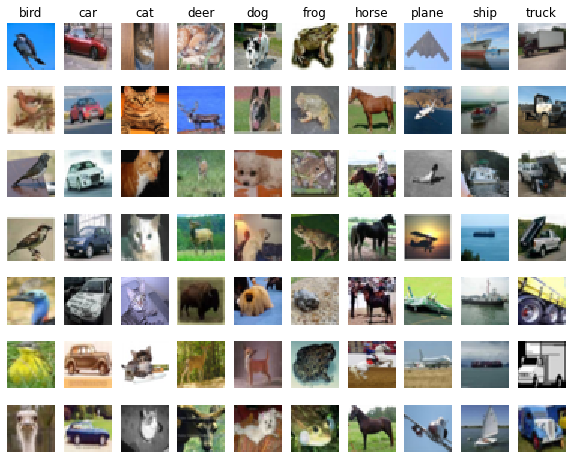

In [4]:
def load_image_as_numpy(image_path):
    return np.asarray(Image.open(image_path), dtype=float)

classes = [
    'plane', 'car', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck',
]
num_classes = len(classes)
samples_per_class = 7
for label, cls in enumerate(sorted(classes)):
    for i in range(samples_per_class):
        image_path = os.path.join(
            cifar_root,
            cls,
            str(i+1).zfill(4) + ".png"
        )  # e.g. cifar10/plane/0001.png
        image = np.asarray(Image.open(image_path))  # open image as numpy array
        plt_idx = i * num_classes + label + 1  # calculate plot location in the grid
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(image.astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)  # plot class names above columns
plt.show()

## 3. ImageFolderDataset Implementation

Loading images as we have done above is a bit cumbersome. Therefore, we will now write a custom **Dataset** class, which takes care of the loading for us. This is always the first thing you have to implement when starting a new deep learning project.

### 3.1 Dataset Class

The **Dataset** class is a wrapper that loads the data from a given filepath and returns a dictionary containing already prepared data, as we have done above. Datasets always need to have the following two methods implemented:
- `__len__(self)` is a method that should simply calculate and return the number of images in the dataset. After it is implemented, we can simply call it with `len(dataset)`.
- `__getitem__(self, index)` should return the image with the given index from your dataset. Implementing this will allow you to access your dataset like a list, i.e. you can then simply call `dataset[9]` to access the 10th image in the dataset.

Generally, you will have to implement a different dataset for every project. However, we will provide you with base dataset classes for future projects.

### 3.2 ImageFolderDataset Implementation

Now it is your turn to implement such a dataset class for CIFAR-10. To do so, open `exercise_code/data/image_folder_dataset.py` and check the following three methods of `ImageFolderDataset`:
- `make_dataset(directory, class_to_idx)` should load the prepared data from a given directory root (`directory`) into two lists (`images` and `labels`). `class_to_idx` is a dict mapping class (e.g. 'cat') to label (e.g. 1).
- `__len__(self)` should calculate and return the number of images in your dataset.
- `__getitem__(self, index)` should return the image with the given index from your dataset.

<div class="alert alert-success">
    <h3>Task: Check Code</h3>
    <p>Please read <code>make_dataset(directory, class_to_idx)</code> and make sure to familiarize with its output as you will need to interact with it for the following tasks. Additionally, it would be wise decision to get familiar with python's os library which will be of utmost importance for most datasets you will write in future projects. As it is not beginner friendly, we removed it for this exercise but it is an important skill for a DL practicer.</p>
</div>

<div class="alert alert-info">
    <h3>Task: Implement</h3>
    <p>Implement the <code>__len__(self)</code> method and test your implementation by running the following cell.
    </p>
</div>

In [7]:
dataset = ImageFolderDataset(
    root=cifar_root,
)

_ = test_len_dataset(dataset)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



<div class="alert alert-info">
    <h3>Task: Implement</h3>
    <p>Implement the <code>__getitem__(self, index)</code> method and test your implementation by running the following cell.
    </p>
    <p><b>Hint:</b> You may want to reuse parts of the 'Data Visualization' code above in your implementation of <code>__getitem__()</code>.
</div>

In [21]:
dataset = ImageFolderDataset(
    root=cifar_root,
)

_ = test_item_dataset(dataset)

GetItemTestType passed.
GetItemTestImageShape passed.
Method __getitem__() correctly implemented. Tests passed: 2/2
Score: 100/100


### 3.3 Dataset Usage

Now that we have implemented all required parts of the ImageFolderDataset, using the `__getitem__()` method, you can now access your dataset as conveniently like we would access a list:

In [22]:
sample_item = dataset[0]
sample_image = sample_item["image"]
sample_label = sample_item["label"]

print('Sample image shape:', sample_image.shape)
print('Sample label:', sample_label)
print('Sample image first values:', sample_image[0][0])

Sample image shape: (32, 32, 3)
Sample label: 0
Sample image first values: [  3 125 233]


As we can see, the images are represented as uint8 values for each of our three RGB color channels. The data type and scale will be important later.

As you implemented both `__len__()` and `__getitem__()`, you can even iterate over your dataset now with a simple for loop! 

In [23]:
num_samples = 0
for sample in tqdm(dataset):
    num_samples += 1
    
print("Number of samples:", num_samples)

61941it [01:42, 604.40it/s]                            


KeyboardInterrupt: 

## 4. Transforms and Image Preprocessing

Before training machine learning models, we often need to preprocess our data. For image datasets, two commonly applied techniques are:
1. Normalize all images so that each value is either in [-1, 1] or [0, 1] as well as to convert it to floating point numbers by doing so
2. Compute the mean image and substract it from all images in the dataset

These transform classes are callables, meaning that you will be able to simply use them as follows:

```transform = Transform()
images_transformed = transform(images)```

We will realize this is our pipeline by defining so called transforms. Instead of globally applying them to our input data, we will apply those for each sample after loading in our `__getitem__` call of our dataset.

<div class="alert alert-info">
    <h3>Task: Implement</h3>
    <p>Revisit the <code>__getitem__(self, index)</code> method in <code>exercise_code/data/image_folder_dataset.py</code>  such that it applies to <code>self.transform</code>. With that change we can simply define the transforms during dataset creation and those will be automatically applied for each <code>__getitem__</code> call. Make sure not to break it though ;).
</div>

In [24]:
dataset = ImageFolderDataset(
    root=cifar_root,
)

_ = test_transform_dataset(dataset)

GetItemTestType passed.
GetItemTestImageShape passed.
GetItemTestTransformApplied passed.
Method __getitem__() correctly implemented. Tests passed: 3/3
Score: 100/100


Equipped with this change, you can now easily add those two preprocessing techniques for CIFAR-10, as we will do in the following by implementing the classes `RescaleTransform` and `NormalizeTransform` in `exercise_code/data/transforms.py`.

### 4.1 Rescaling Images using RescaleTransform

Let's start by implementing `RescaleTransform`. If you look at the `__init__()` method you will notice it has four arguments:
* **out_range** is the range you wish to rescale your images to. E.g. if you want to scale your images to [-1, 1], you would use `range=(-1, 1)`. By default, we will scale to [0, 1].
* **in_range** is the value range of the data prior to rescaling. For uint8 images, this will always be (0, 255).

<div class="alert alert-info">
    <h3>Task: Implement</h3>
    <p>Implement the <code>__call__()</code> method of <code>RescaleTransform</code> and test your implementation by running the following cell.
</div>

In [ ]:
rescale_transform = RescaleTransform()
dataset_rescaled = ImageFolderDataset(
    root=cifar_root,
    transform=rescale_transform
)

_ = test_rescale_transform(dataset_rescaled)

 59%|█████▉    | 29435/50000 [00:25<00:33, 611.97it/s] 

If you look at the first image, you should now see that all values are between 0 and 1.

In [44]:
sample_item = dataset_rescaled[0]
sample_label = sample_item["label"]
sample_image = sample_item["image"]

print("Max value:", np.max(sample_image))
print("Min value:", np.min(sample_image))
print('Sample rescaled image first values:', sample_image[0][0])

Max value: 1.0
Min value: 0.00392156862745098
Sample rescaled image first values: [0.01176471 0.49019608 0.91372549]


### 4.2 Normalize Images to Standard Gaussian using NormalizeTransform

Let us now move on to the `NormalizeTransform` class. The `NormalizeTransform` class normalizes images channel-wise and it's `__init__` method has two arguments:
* **mean** is the normalization mean, which we substract from the dataset.
* **std** is the normalization standard deviation. By scaling our data with a factor of `1/std` we will normalize the standard deviation accordingly.

Have a look at the code in `exercise_code/data/transforms.py`.

What we would like to do now is to normalize our CIFAR-10 **images channel-wise** to standard normal. To do so, we need to calculate the **per-channel image mean and standard deviation first**, which we can then provide to `NormalizeTransform` to normalize our data accordingly.

In [ ]:
# We first have to load all rescaled images
rescaled_images = []
for sample in tqdm(dataset_rescaled):
    rescaled_images.append(sample["image"])
rescaled_images = np.array(rescaled_images)

<div class="alert alert-info">
    <h3>Task: Implement</h3>
    <p>Implement the <code>compute_image_mean_and_std()</code> method in <code>exercise_code/data/transforms.py</code> and compute the rescaled dataset's mean and variance by running the following cell.
</div>

In [ ]:
cifar_mean, cifar_std = compute_image_mean_and_std(rescaled_images)
print("Mean:\t", cifar_mean, "\nStd:\t", cifar_std)

To test your implementation, run the following code:

In [ ]:
_ = test_compute_image_mean_and_std(cifar_mean, cifar_std)

In [ ]:
# We will delete the rescaled images now from your ram as they are no longer needed
try:
    del rescaled_images
except NameError:
    pass

Now we can use the mean and standard deviation you computed to normalize the data we load, simply by adding the `NormalizeTransform` to the list of transformation our dataset applies in `__getitem__()`.

<div class="alert alert-success">
    <h3>Task: Check Code</h3>
    <p>Please check out the <code>ComposeTransform</code> in <code>transforms.py</code>. Later on, we will most often use multiple transforms and chain them together. Remember that the order is important here!</p>
</div>

In [ ]:
# Set up both transforms using the parameters computed above
rescale_transform = RescaleTransform()
normalize_transform = NormalizeTransform(
    mean=cifar_mean,
    std=cifar_std
)

final_dataset = ImageFolderDataset(
    root=cifar_root,
    transform=ComposeTransform([rescale_transform, normalize_transform])
)

We can now check out the results of our transformed samples:

In [ ]:
sample_item = final_dataset[0]
sample_label = sample_item["label"]
sample_image = sample_item["image"]

print('Sample normalized image shape:', sample_image.shape)
print('Sample normalized image first values:', sample_image[0][0])

## 5. Save your Dataset
Now save your dataset and transforms using the following cell. This will save it to a pickle file `models/cifar_dataset.p`. We will use this dataset for the next notebook and it will count for the submission.

<div class="alert alert-danger">
    <h3>Note</h3>
    <p>Each time you make changes in `dataset`, you need to rerun the following code to make your changes saved, but <b>this is NOT the file which you should submit</b>. You will find the final file for submission in the second notebook.</p>
</div>

In [ ]:
save_pickle(
    data_dict={
        "dataset": final_dataset,
        "cifar_mean": cifar_mean,
        "cifar_std": cifar_std,
    },
    file_name="cifar_dataset.p"
)

# Key Takeaways
1. Always have a look at your data before you start training any models on it.
2. Datasets should be organized in corresponding **Dataset** classes that support `__len__` and `__getitem__` methods, which allows us to call `len(dataset)` and `dataset[index]`.
3. Data often needs to be preprocessed; such preprocessing can be implemented in **Transform** classes, which are callables that can be simply applied via `data_transformed = transform(data)`. However, we will rarely do that and apply transforms on the fly using a dataloader which we introducing in the next notebook.